Тестовое изображение
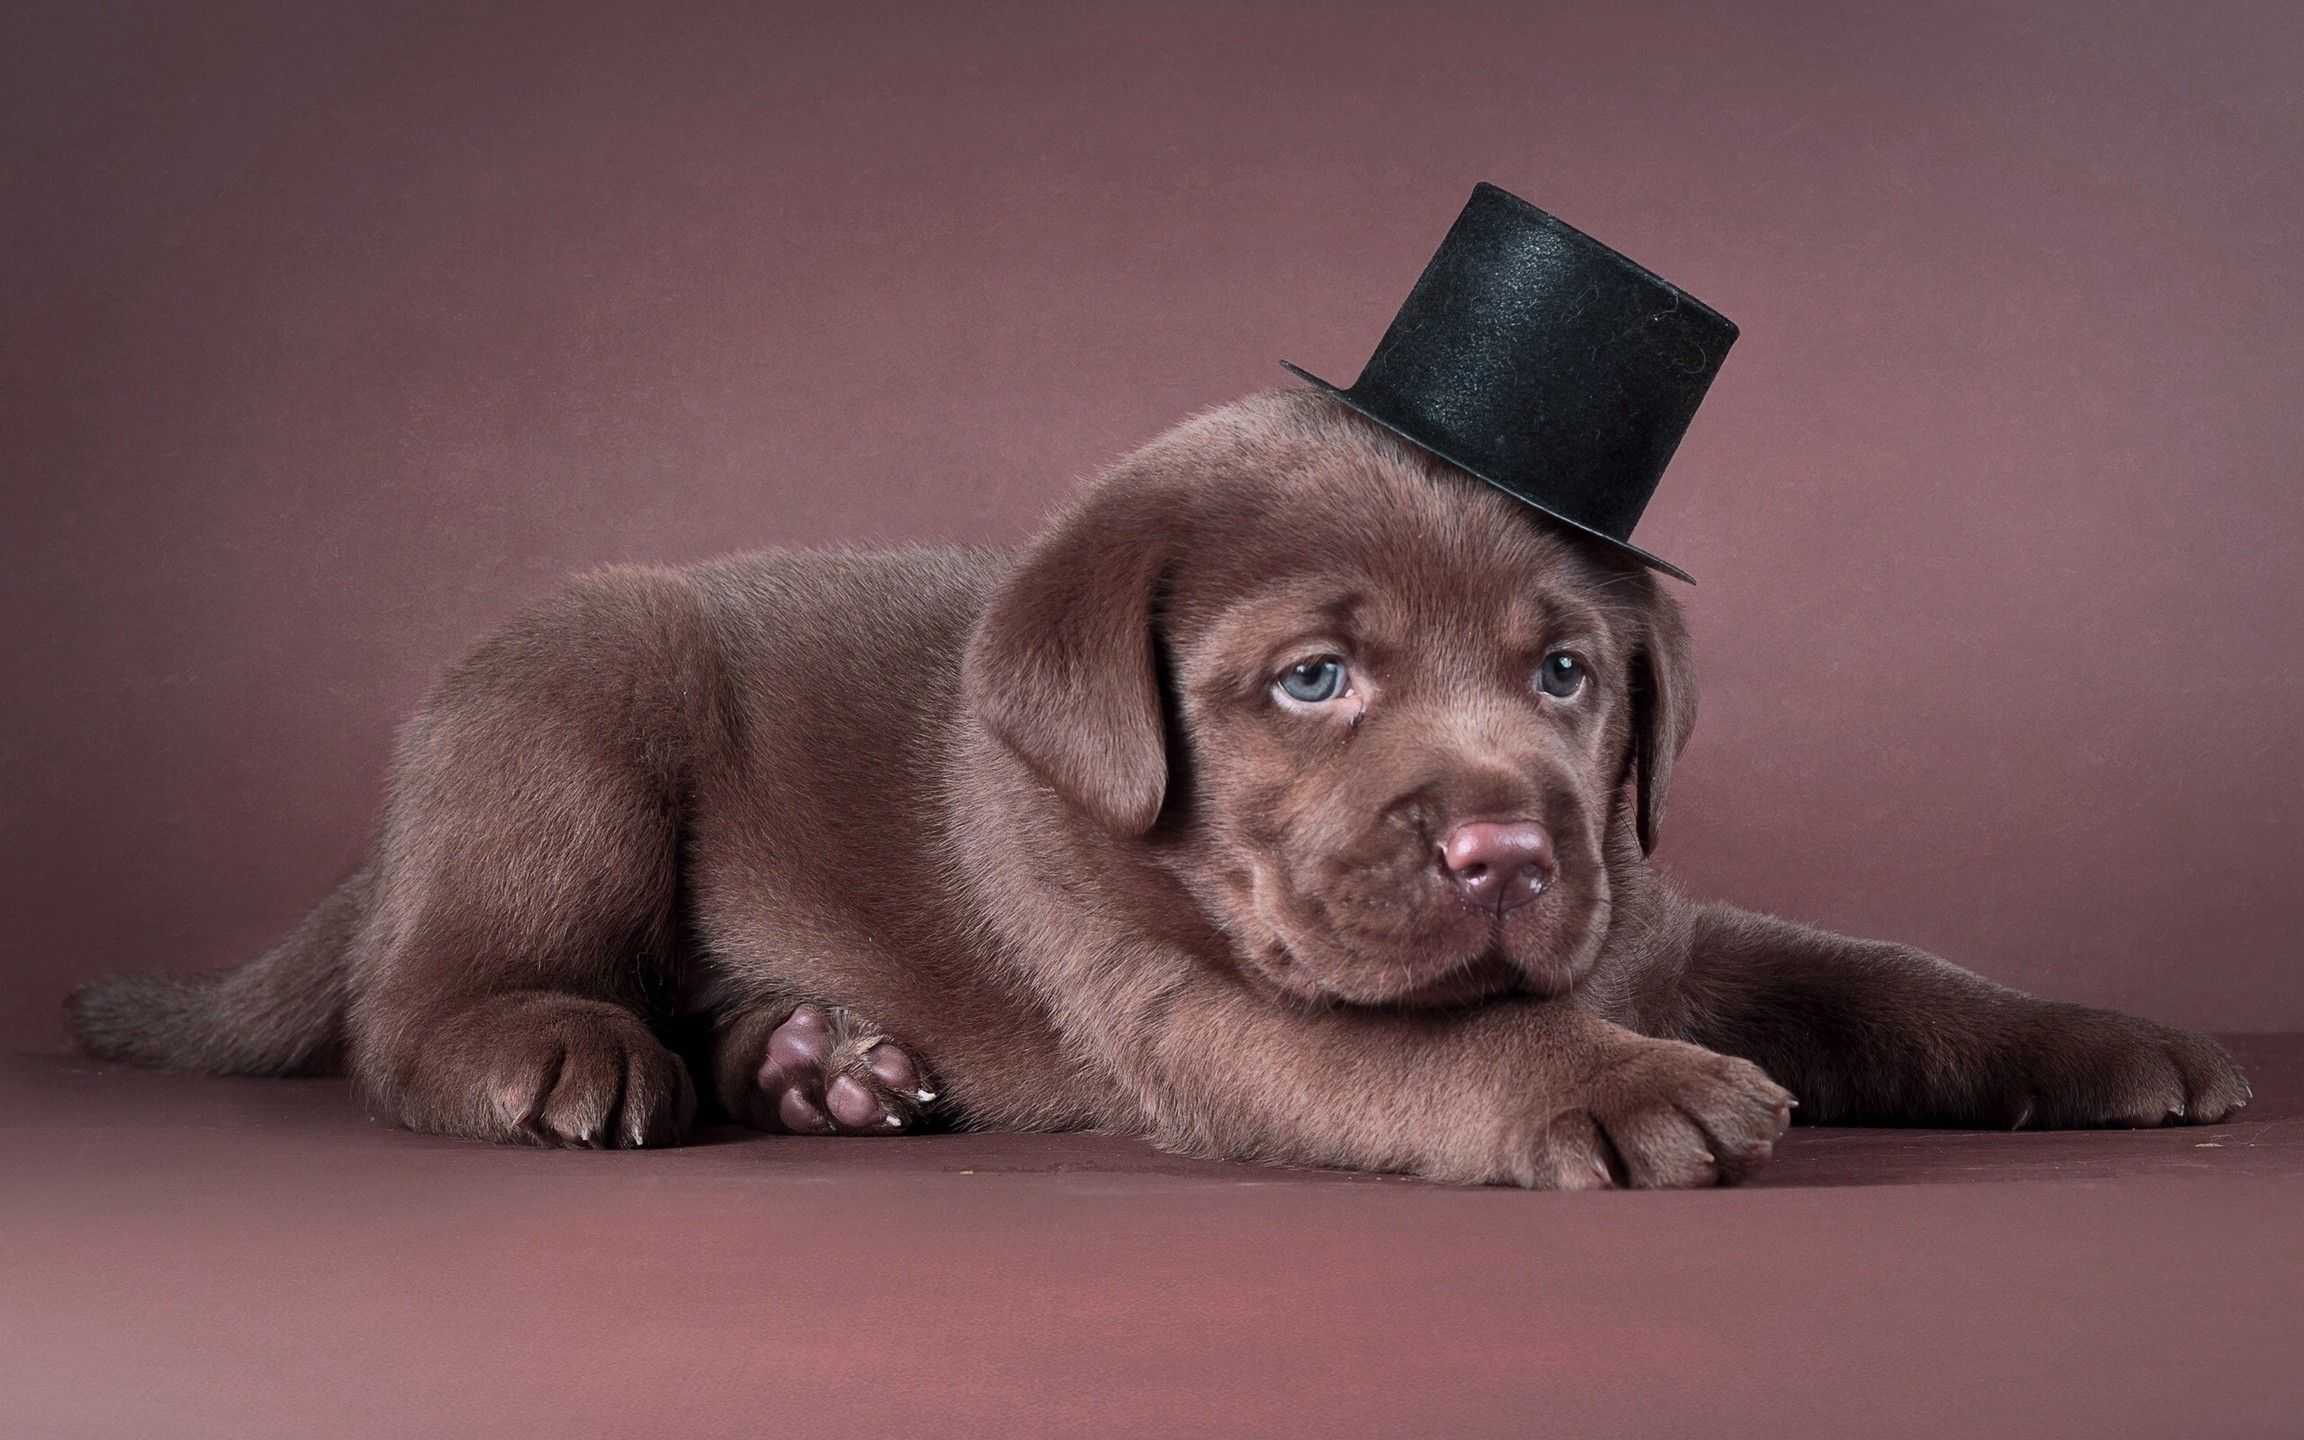

In [5]:
from google.colab import files
from PIL import Image
from datasets import load_dataset
from transformers import AutoImageProcessor, SwinForImageClassification
import torch
import io


model = SwinForImageClassification.from_pretrained(
    "microsoft/swin-tiny-patch4-window7-224"
)
image_processor = AutoImageProcessor.from_pretrained(
    "microsoft/swin-tiny-patch4-window7-224"

)
uploaded = files.upload()

for filename in uploaded.keys():
    img = Image.open(io.BytesIO(uploaded[filename])).convert('RGB')


    inputs = image_processor(images=img, return_tensors="pt")


    inputs = {k: v.to(model.device) for k, v in inputs.items()}

    with torch.no_grad():
        outputs = model(**inputs)
        logits = outputs.logits


    predicted_class_idx = logits.argmax(-1).item()
    predicted_label = model.config.id2label[predicted_class_idx]


    predicted_label_id = logits.argmax(-1).item()
    predicted_label_text = model.config.id2label[predicted_label_id]

    print(predicted_label_text)

Fetching 1 files:   0%|          | 0/1 [00:00<?, ?it/s]

Saving dog1.jpg to dog1 (1).jpg
Labrador retriever
